In [1]:
#set up

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import math
import scipy.ndimage as ndi
from skimage.color import rgb2gray
from skimage import feature

## Gaussian Smoothing

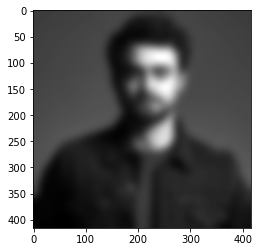

In [2]:
sigma = 8.0
size = math.ceil(3*sigma)

probs = [math.exp(-i*i/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma) for i in range(-size,size+1)] 
kernel = np.outer(probs, probs)

faceIm = np.double(imread('harry.png'))
gIm = ndi.correlate(faceIm, kernel)
plt.imshow(gIm, cmap='gray')
plt.imsave('gIm.bmp', gIm, cmap='gray')

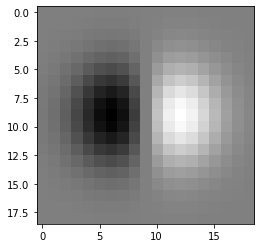

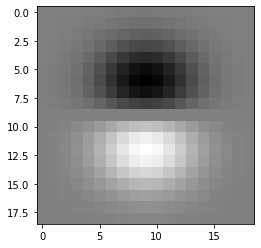

In [3]:
def gaussDeriv2D(sigma):
    size = math.ceil(3*sigma)
    side = 2*size+1
    Gx = np.zeros((side,side))
    Gy = np.zeros((side,side))
    for i,y in zip(range(0,side),range(-size,size+1)):
        for j,x in zip(range(0,side),range(-size,size+1)):
            Gx[i,j] = math.exp((-x*x-y*y)/(2*sigma**2))*x/(2*math.pi*sigma**4)
            Gy[i,j] = math.exp((-x*x-y*y)/(2*sigma**2))*y/(2*math.pi*sigma**4)
    
    plt.imshow(Gx,cmap='gray')
    #plt.colorbar()
    plt.show()
    
    plt.imshow(Gy,cmap='gray')
    #plt.colorbar()
    plt.show()
    
    return Gx, Gy

Gx, Gy = gaussDeriv2D(3)

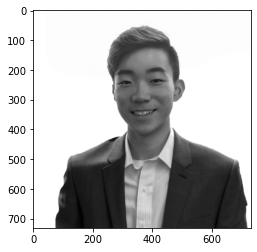

In [4]:
me = rgb2gray(imread('me.jpg'))
plt.imshow(me,cmap='gray')

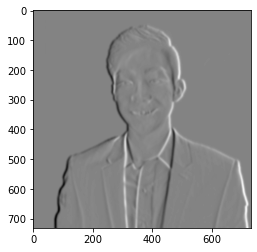

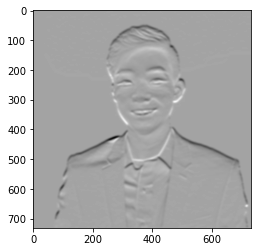

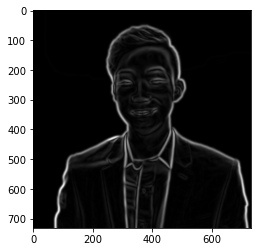

In [5]:
gxIm = ndi.correlate(me, Gx)
gyIm = ndi.correlate(me, Gy)
magIm = (np.array(gxIm)**2+np.array(gyIm)**2)**0.5

plt.imshow(gxIm, cmap='gray')
plt.show()

plt.imshow(gyIm, cmap='gray')
plt.show()

plt.imshow(magIm, cmap='gray')
plt.show()

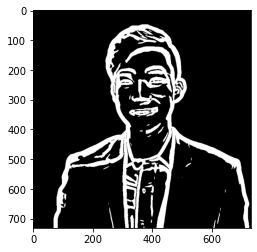

In [6]:
tIm = magIm > 0.01
plt.imshow(tIm, cmap='gray')
plt.show()

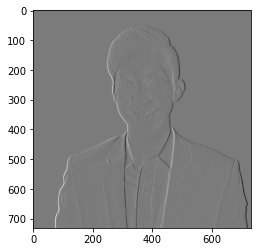

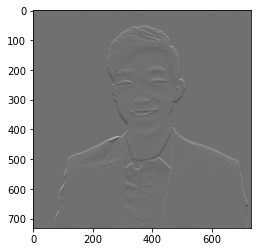

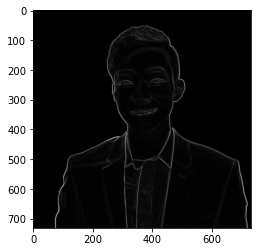

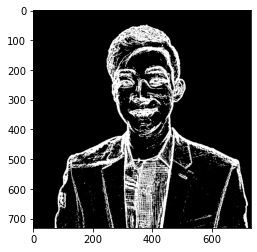

In [7]:
fxIm = -ndi.sobel(me,axis=1,mode='nearest')
fyIm = -ndi.sobel(me,axis=0,mode='nearest')
magIm = (np.array(fxIm)**2+np.array(fyIm)**2)**0.5
tIm = magIm > 0.1

plt.imshow(fxIm, cmap='gray')
plt.show()

plt.imshow(fyIm, cmap='gray')
plt.show()

plt.imshow(magIm, cmap='gray')
plt.show()

plt.imshow(tIm, cmap='gray')
plt.show()

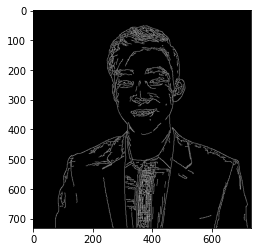

In [8]:
edges = feature.canny(me, sigma=0.5)
plt.imshow(edges,cmap='gray')
plt.show()